In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from Preprocessing import Preprocessing

In [2]:
df_3600_healthy = pd.read_csv('../data/3600rpm_5kw_healthy_0.2s_0.05ms.csv')
df_3600_1turn_1rf = pd.read_csv('../data/3600rpm_5kw_1turn_1rf_0.2s_0.05ms.csv')
df_3600_1turn_001rf = pd.read_csv('../data/3600rpm_5kW_1turn_0.01rf_0.2s_0.05ms.csv')
df_3600_5turn_1rf = pd.read_csv('../data/3600rpm_5kw_5turns_1rf_0.2s_0.05ms.csv')
df_3600_5turn_001rf = pd.read_csv('../data/3600rpm_5kw_5turns_0.01rf_0.2s_0.05ms.csv')

In [3]:
preprocessed_healthy = Preprocessing(df_3600_healthy, 3600)
preprocessed_1turn_1rf = Preprocessing(df_3600_1turn_1rf, 3600)
preprocessed_1turn = Preprocessing(df_3600_1turn_001rf, 3600)
preprocessed_5turns_1rf = Preprocessing(df_3600_5turn_1rf, 3600)
preprocessed_5turns = Preprocessing(df_3600_5turn_001rf, 3600)

In [4]:
preprocessed_healthy.dataset
preprocessed_healthy.fundamental_total_sample_period(0.05)
preprocessed_healthy.nsc_augment()

preprocessed_1turn_1rf.dataset
preprocessed_1turn_1rf.fundamental_total_sample_period(0.05)
preprocessed_1turn_1rf.nsc_augment()

preprocessed_1turn.dataset
preprocessed_1turn.fundamental_total_sample_period(0.05)
preprocessed_1turn.nsc_augment()

preprocessed_5turns_1rf.dataset
preprocessed_5turns_1rf.fundamental_total_sample_period(0.05)
preprocessed_5turns_1rf.nsc_augment()

preprocessed_5turns.dataset
preprocessed_5turns.fundamental_total_sample_period(0.05)
preprocessed_5turns.nsc_augment()

d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(A)'][i: i + self.Ns] = self.dataset.iloc[i: i + self.Ns, 1].max()
d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(C)'][i: i + self.Ns] = self.dataset.iloc[i: i + self.Ns, 3].max()
d:\Programing\Python

,Time [ms],Current(PhaseA) [A],Current(PhaseB) [A],Current(PhaseC) [A],NSC
0,0.00,0.000000,0.000000,0.000000,12.811372
1,0.05,0.000002,0.191335,-0.191338,12.811372
2,0.10,-0.000001,0.383679,-0.383678,12.811372
3,0.15,-0.000005,0.576023,-0.576018,12.811372
4,0.20,-0.000008,0.768367,-0.768359,12.811372
...,...,...,...,...,...
3997,199.85,20.488022,-9.431173,-11.056848,1.023628
3998,199.90,20.411687,-8.244157,-12.167530,1.023628
3999,199.95,20.568707,-7.208271,-13.360436,1.023628
4000,200.00,21.038614,-6.375023,-14.663591,1.023628


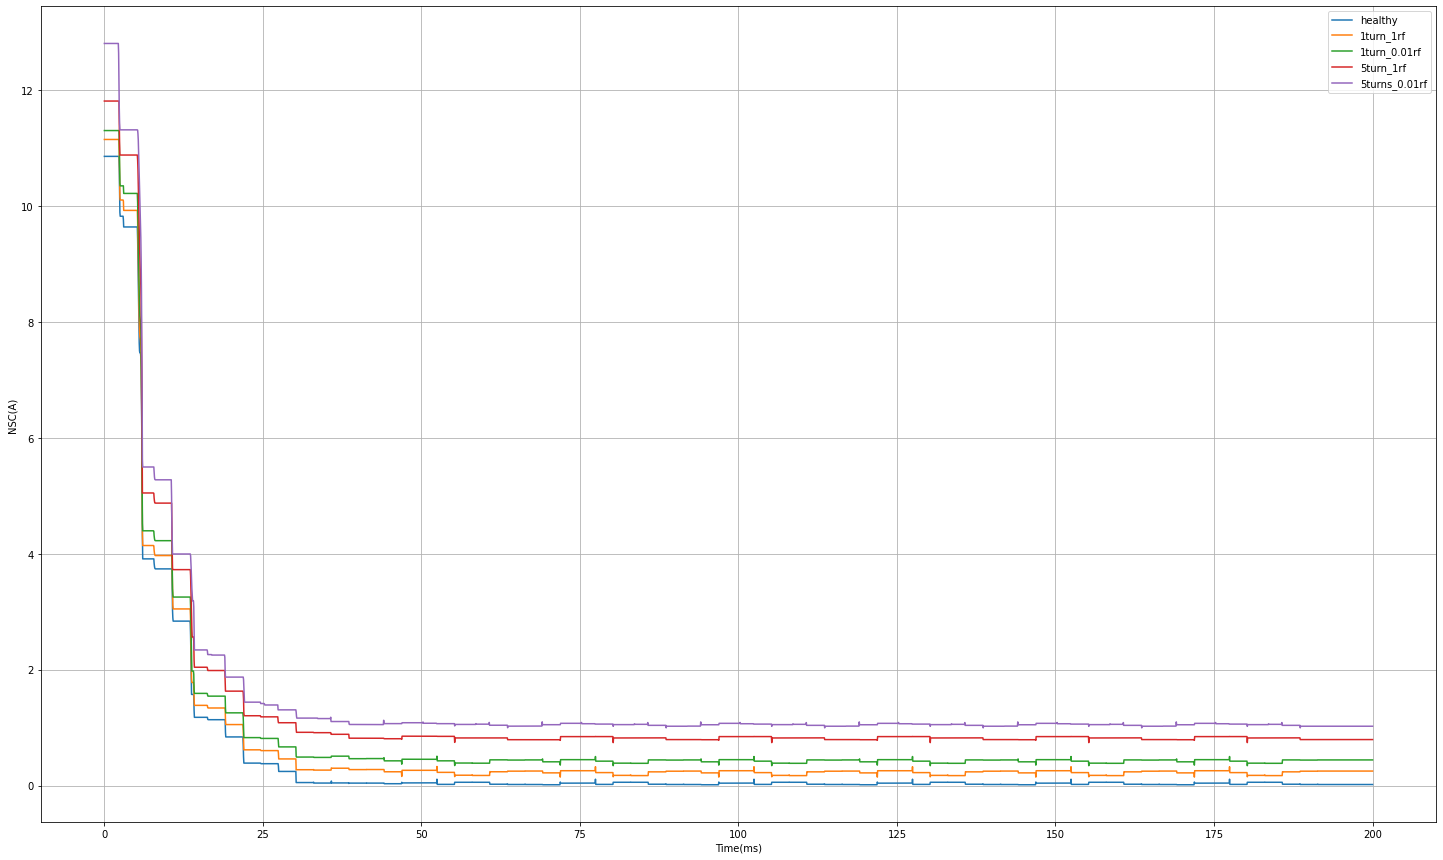

In [5]:
plt.figure(figsize=(25, 15))
plt.xlabel('Time(ms)')
plt.ylabel('NSC(A)')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_healthy.dataset['NSC'], label='healthy')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_1turn_1rf.dataset['NSC'], label='1turn_1rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_1turn.dataset['NSC'], label='1turn_0.01rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_5turns_1rf.dataset['NSC'], label='5turn_1rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_5turns.dataset['NSC'], label='5turns_0.01rf')
plt.legend()
plt.grid(True)

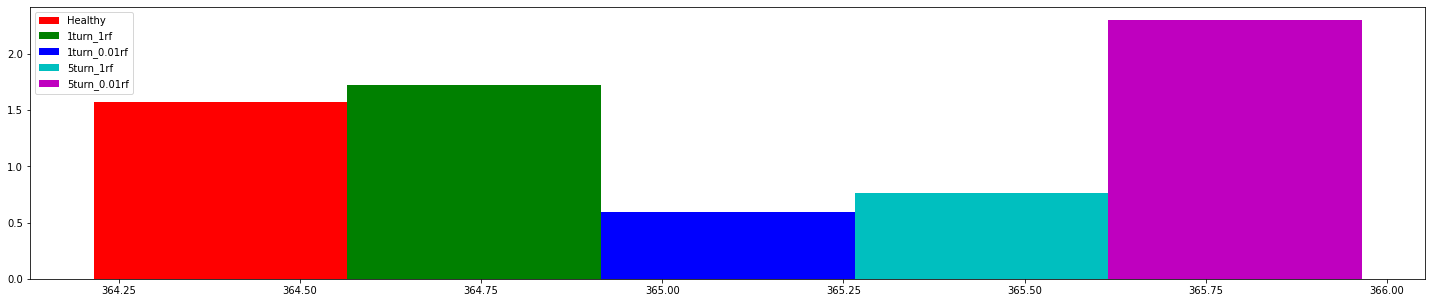

In [11]:
data1 = preprocessed_healthy.truncate_to_Ns_fundamental(2000, 2166)
data2 = preprocessed_1turn_1rf.truncate_to_Ns_fundamental(2000, 2166)
data3 = preprocessed_1turn.truncate_to_Ns_fundamental(2000, 2166)
data4 = preprocessed_5turns_1rf.truncate_to_Ns_fundamental(2000, 2166)
data5 = preprocessed_5turns.truncate_to_Ns_fundamental(2000, 2166)

x_f, y_f = preprocessed_healthy.dft('Current(PhaseA) [A]', data1)
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseA) [A]',data2)
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseA) [A]', data3)
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseA) [A]', data4)
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseA) [A]', data5)

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

In [7]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseB) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseB) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseB) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseB) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseB) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

TypeError: dft() missing 1 required positional argument: 'data'

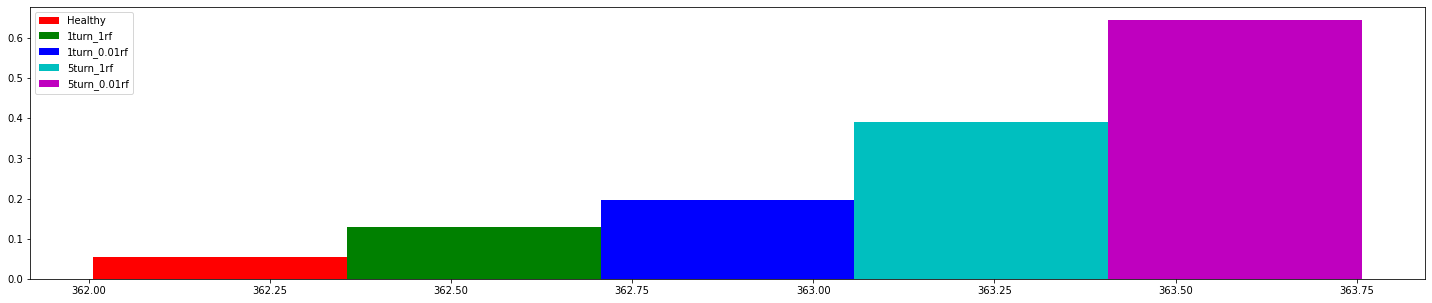

In [ ]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseC) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseC) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseC) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseC) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseC) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

In [ ]:
preprocessed_healthy.Ns

166

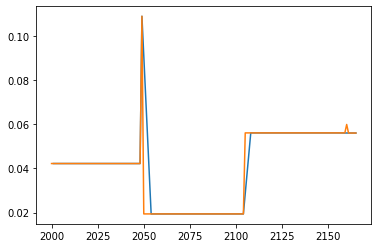

In [ ]:
plt.plot(preprocessed_healthy.truncate_to_Ns_fundamental(2000, 2166).NSC)
plt.plot(preprocessed_healthy.dataset[2000:2166].NSC)

In [ ]:
arr1 = np.array([1, 2, 3])
arr1 + 500

array([501, 502, 503])

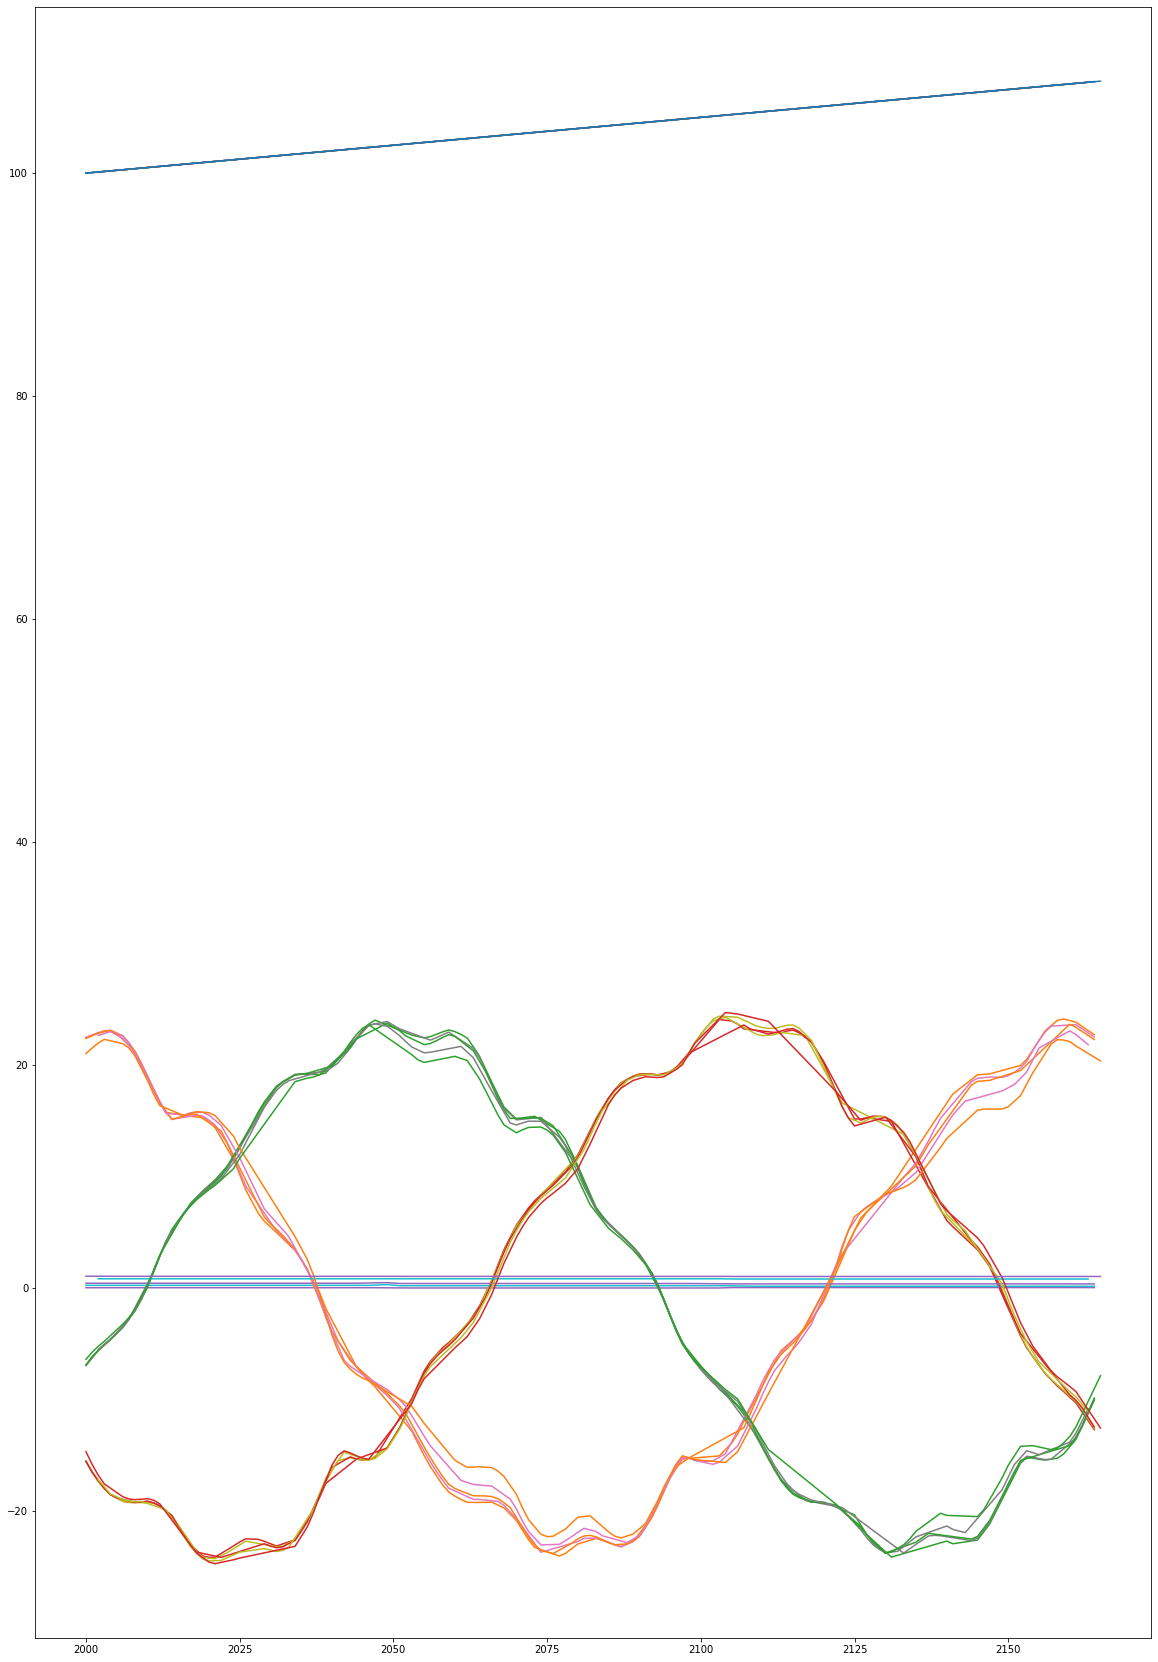

In [12]:
plt.figure(figsize=(20, 30))
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)
plt.plot(data4)
plt.plot(data5)